In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_data = pd.read_csv("C:/Users/LENOVO/Downloads/2.02.+Binary+predictors.csv")
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


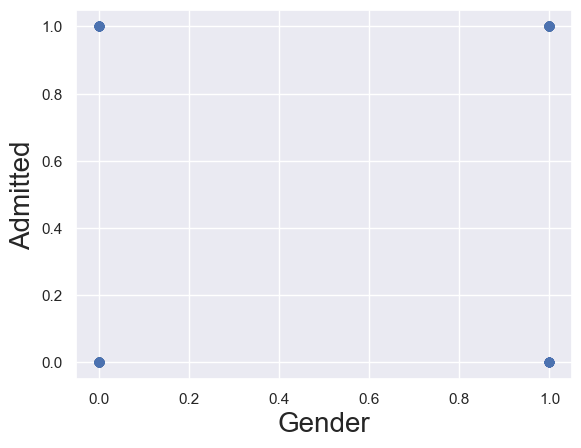

In [4]:
plt.scatter(data['Gender'],data['Admitted'])
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Admitted',fontsize=20)
plt.show()

In [8]:
y = data['Admitted']
x1= data[['Gender','SAT']]
x = sm.add_constant(x1)

## plot with logistic Regression

In [10]:
reg_Logit = sm.Logit(y,x)
results_Log = reg_Logit.fit()
def f(x1,b0,b1):
    return np.array(np.exp(x1*b1 + b0)/(1+np.exp(x1*b1 + b0)))
f_sorted = np.sort(f(x1,results_Log.params[0],results_Log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,c='pink')
plt.plot(x_sorted,f_sorted,lw=5,c='blue')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('Admi',fontsize=20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


## Regression

In [11]:
reg_Logit = sm.Logit(y,x)
results_Log = reg_Logit.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [12]:
# function value shows value of function after 10th iteration (max iterations in statsmodels is 35 ) 

In [13]:
results_Log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.8249
Time:                        00:50:29   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
#MLE maximum liklihood estimation:
## likehood fucntion : a function which estimates how likely it is that our model describes the underlying relationship between the variables 
#mle tries to maximize this function 
##the computer is going through different values , until it finds a model , for which the likelihood is the highest 
# when it can no longer optimize it stops
## log likehood is almost always negative 
## LL - null : 
# the log - likelihood of model which has no dependent variables
## LLR measures if our model is statistically different from LL-null
## pseudo - R squared :  McFadden's R-squared(good -> btw 0.2 and 0.4)


In [14]:
np.exp(1.9449)

6.992932526814459

In [17]:
np.set_printoptions(formatter={'float':lambda x :"{0:0.2f}".format(x)})
results_Log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [18]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [19]:
results_Log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [20]:
cm_df = pd.DataFrame(results_Log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [22]:
# for 69 observations model predicted 0 when it was 0 
# for 90 observations model predicted 1 when it was 1 
# for 4 observations model predicted 0 when it was actual 1
# for 4 observations model predicted 1 when it was actual 0
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train


0.9464285714285714

In [23]:
test = pd.read_csv("C:/Users/LENOVO/Downloads/2.03.+Test+dataset.csv")
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Male':0,'Female':1})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [24]:
x

,const,Gender,SAT
0,1.0,0,1363
1,1.0,1,1792
2,1.0,1,1954
3,1.0,0,1653
4,1.0,0,1593
...,...,...,...
163,1.0,1,1722
164,1.0,0,1750
165,1.0,0,1555
166,1.0,0,1524


In [29]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data =sm.add_constant(test_data)
test_data = test_data[x.columns.values]
test_data

,const,Gender,SAT
0,1.0,0,1323
1,1.0,1,1725
2,1.0,1,1762
3,1.0,0,1777
4,1.0,0,1665
5,1.0,1,1556
6,1.0,1,1731
7,1.0,1,1809
8,1.0,1,1930
9,1.0,0,1708


In [30]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [31]:
cm = confusion_matrix(test_data,test_actual,results_Log)

In [32]:
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [34]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0
